In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import feature_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
from sklearn import tree
import matplotlib.pyplot as plt

# import graphviz
# from sklearn.tree import export_graphviz

In [2]:
bank = pd.read_csv("bank-additional-full.csv", delimiter=';')

In [3]:
bank.shape

(41188, 21)

In [4]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
for i in bank:
    if bank[i].dtypes == 'object':
        num = LabelEncoder()
        bank[i] = num.fit_transform(bank[i].astype('str'))

bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
bank.corr(method = "spearman").round(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.00,0.02,-0.43,-0.11,0.19,-0.00,-0.01,0.03,-0.02,-0.02,...,0.01,-0.00,-0.01,0.02,0.05,0.04,0.11,0.05,0.04,-0.01
job,0.02,1.00,-0.00,0.01,0.01,0.00,-0.01,-0.00,-0.01,0.00,...,-0.01,-0.02,0.01,0.01,0.00,0.00,0.04,0.01,-0.00,0.01
marital,-0.43,-0.00,1.00,0.12,-0.09,0.01,0.01,-0.06,-0.01,0.00,...,-0.01,-0.04,0.04,-0.00,-0.07,-0.06,-0.04,-0.07,-0.07,0.05
education,-0.11,0.01,0.12,1.00,-0.18,0.02,0.01,-0.11,-0.07,-0.02,...,0.00,-0.05,0.03,0.02,-0.02,-0.07,0.10,-0.00,-0.01,0.06
default,0.19,0.01,-0.09,-0.18,1.00,-0.02,-0.00,0.14,-0.03,-0.01,...,0.03,0.08,-0.11,0.03,0.18,0.16,0.03,0.17,0.16,-0.10
housing,-0.00,0.00,0.01,0.02,-0.02,1.00,0.04,-0.08,-0.01,0.00,...,-0.01,-0.01,0.02,-0.01,-0.05,-0.09,-0.03,-0.04,-0.03,0.01
loan,-0.01,-0.01,0.01,0.01,-0.00,0.04,1.00,-0.01,-0.01,-0.01,...,0.01,0.00,0.00,-0.00,0.00,-0.00,-0.01,0.01,0.00,-0.01
contact,0.03,-0.00,-0.06,-0.11,0.14,-0.08,-0.01,1.00,0.24,-0.01,...,0.07,0.12,-0.24,0.13,0.23,0.66,0.27,0.14,0.11,-0.14
month,-0.02,-0.01,-0.01,-0.07,-0.03,-0.01,-0.01,0.24,1.00,0.02,...,-0.07,-0.05,0.13,-0.08,-0.40,-0.02,-0.04,-0.47,-0.36,-0.01
day_of_week,-0.02,0.00,0.00,-0.02,-0.01,0.00,-0.01,-0.01,0.02,1.00,...,-0.06,-0.01,-0.01,0.02,0.03,0.00,0.04,0.03,0.03,0.02


Text(0.5, 1.0, 'Correlation matrix')

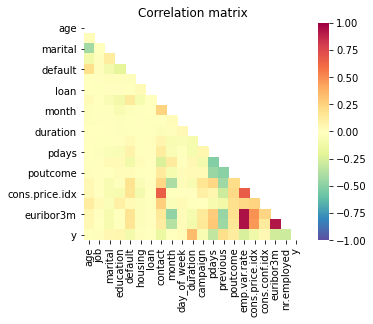

In [9]:
corrs = bank.corr(method = "spearman")
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-1, vmax=1)
plt.title('Correlation matrix')

In [10]:
bank_v2 = bank.drop(['emp.var.rate'], axis=1)

Text(0.5, 1.0, 'Correlation matrix')

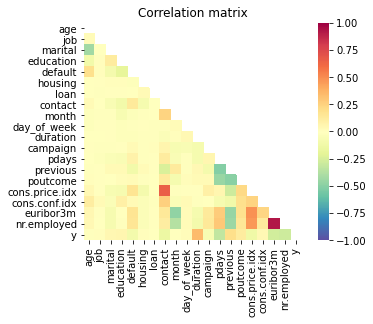

In [11]:
corrs = bank_v2.corr(method = "spearman")
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-1, vmax=1)
plt.title('Correlation matrix')

In [12]:
X = bank_v2.iloc[:, 0:18]
y = bank_v2.iloc[:, 19]
print(X)
X = sm.add_constant(X)
logit_mod = sm.Logit(y, X).fit()

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  duration  campaign  pdays  prev

In [13]:
print(logit_mod.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41169
Method:                           MLE   Df Model:                           18
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.3854
Time:                        16:47:16   Log-Likelihood:                -8912.0
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -64.7463      3.964    -16.334      0.000     -72.515     -56.977
age                0.0069      0.002      3.724      0.000       0.003       0.011
job                0.0087      0.006

In [14]:
#A
print(np.exp(logit_mod.params))
print(np.exp(logit_mod.conf_int()))

'''If the p-value is less that 0.05, then the variable is significant. In this case, our significant variables are: age(>1), marital(>1), education(>1), default(<1), contact(<1) ,month(<1), day_of_week(>1), duration(>1), campaign(<1), pdays(<1), poutcome(>1), cons.price.idx(>1), cons.conf.idx(>1), and euribor3m(<1) with the item in the parentheses indicating its odds ratio's value as either greater than 1 (likely to occur as a result of this variable) or less than 1 (likely to not occur as a result of this variable) So, according to our regression model, age, marital status, education, day of the week, duration, poutcome, cons.price.idx, and cons.conf.idx correlate positively with the odds of a term deposit being opened, while the others suggest that their presence correlates negatively with the opening of a term deposit. These variables do not vary much within a 95% CI, as all of the variables remain on their side of 1, so our CI agrees with our previously made statements for all significant variables.'''

const             7.603865e-29
age               1.006970e+00
job               1.008715e+00
marital           1.110005e+00
education         1.060306e+00
default           6.391263e-01
housing           9.984252e-01
loan              9.637759e-01
contact           5.117884e-01
month             9.467402e-01
day_of_week       1.056168e+00
duration          1.004547e+00
campaign          9.546590e-01
pdays             9.989541e-01
previous          9.284043e-01
poutcome          1.578212e+00
cons.price.idx    2.042734e+00
cons.conf.idx     1.081174e+00
euribor3m         4.858224e-01
dtype: float64
                           0             1
const           3.214042e-32  1.798942e-25
age             1.003296e+00  1.010658e+00
job             9.978936e-01  1.019653e+00
marital         1.034715e+00  1.190773e+00
education       1.040122e+00  1.080882e+00
default         5.626666e-01  7.259758e-01
housing         9.596410e-01  1.038777e+00
loan            9.125266e-01  1.017904e+00
contact  

"If the p-value is less that 0.05, then the variable is significant. In this case, our significant variables are: age(>1), marital(>1), education(>1), default(<1), contact(<1) ,month(<1), day_of_week(>1), duration(>1), campaign(<1), pdays(<1), poutcome(>1), cons.price.idx(>1), cons.conf.idx(>1), and euribor3m(<1) with the item in the parentheses indicating its odds ratio's value as either greater than 1 (likely to occur as a result of this variable) or less than 1 (likely to not occur as a result of this variable) So, according to our regression model, age, marital status, education, day of the week, duration, poutcome, cons.price.idx, and cons.conf.idx correlate positively with the odds of a term deposit being opened, while the others suggest that their presence correlates negatively with the opening of a term deposit. These variables do not vary much within a 95% CI, as all of the variables remain on their side of 1, so our CI agrees with our previously made statements for all signif

In [15]:
#B: Classification Report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")
        
logistic = LogisticRegression(max_iter=2000)
logisticclf = logistic.fit(X_train, y_train)
logisticpreds_test = logistic.predict(X_test)
print("Accuracy score for Testing Data: " + str(logistic.score(X_test, y_test)))
print("Accuracy Score for Training Data: " + str(logistic.score(X_train, y_train)))
print(classification_report(y_test, logisticpreds_test))



Accuracy score for Testing Data: 0.9060451565914057
Accuracy Score for Training Data: 0.9088012139605463
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7305
           1       0.64      0.39      0.49       933

    accuracy                           0.91      8238
   macro avg       0.78      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



Our Classification Report goes over the performance of our test data and how accurate of a predictive model it is. According to the data, our model is better with predicting instances where there is no term deposit made. I believe this to be large in part of the lack of term deposits made in our actual dataset, giving the training and testing models little to work with, as shown by the small support value for 1 outputs.

In [16]:
#B: Confusion Matrix

logisticcm = confusion_matrix(y_test, logisticpreds_test)
print(logisticcm)


[[7099  206]
 [ 568  365]]


Specificity = TN/(TN + FP) = 0.3912111468; Negative Predictive Value = TN/(TN + FN) = 0.6392294221 --- So here, we are training our testing data against our training data. The performance resulted in these two values for Specificity and for Negative Predictive Value. According to these values, our specificity states that our training data is not effective in predicting true negative values, since the value is significantly low. Our Negative Predictive Value shows us that our training data is somewhat ineffective at identifying true negative value predictions in comparison to true positives.


In [17]:
# C: Flowchart

treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(X_train, y_train)
treepreds_test = treeclf.predict(X_test)
# We were instructed to skip problems that included use of the graphviz module by an email sent on 12/5

In [18]:
# C: Classification Report

print(classification_report(y_test, treepreds_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7305
           1       0.52      0.53      0.52       933

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



Our classification report for the decision tree model is incredibly similar to the report produced for the logistic regression, with most, if not all values only being off by a hundreth, which can most likely be attributed to the random nature of these calculations making small tweaks to the information that is processed. Essentially, the same conclusions above can be drawn for our model here: our model is better with predicting instances where there is no term deposit made, largely in part of the lack of term deposits made in our actual dataset, giving the training and testing models little to work with, as shown by the small support value for 1 outputs.

In [19]:
# C: Confusion Matrix

treecm = confusion_matrix(y_test, treepreds_test)
print(treecm)

[[6848  457]
 [ 443  490]]


Between the logistic regression and this one, there is some notable variation in results for the confusion matrix. For one, the Specificity on this model is 0.5326902465, which is better than the logistic regression, but the Negative Predictive Value is 0.5193312435, which is worse. Both values are notably low overall, however, suggesting that this model may not be the best.

#E

The first model performs well with informing us of what variables will influence the outcome of the consumer. The log-likelihood is very small, which informs us of the strength of this model. However, the second model is very effective in predicting the outcome of no term deposit being made, while being notably bad at the opposite, likely because of the lack of instances in the original dataset where that outcome occured. The third model shows strong similarities to the second model, but overall, is equal in quality to the first one. Perhaps, even a little worse, as it had less true positive outputs.
The first model appears to be usable for real-world applications, as the value for the log-likelihood is low and the number of observations is high, making for a reliable model.